In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

# Get Data

In [2]:
from merge_years.import_data import get_full_data

In [3]:
!pwd

/Users/admin/code/1kruidenp/fflpred/notebooks


In [4]:
full_raw_data=get_full_data('../raw_data')

In [5]:
full_raw_data.head()

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,yellow_cards,GW,season,position,dreamteam_yearly_average,team_id,team_name,opponent_level,team_level,kickoff_date
0,aaron connolly,0,0,1,0,0.1,534,37,1,0,...,0,4,20,FWD,NaN,4.0,Brighton,1330.0,1010.0,2019-08-31
1,aaron connolly,0,0,1,0,0.3,534,43,1,0,...,0,5,20,FWD,NaN,4.0,Brighton,1180.0,1050.0,2019-09-14
2,aaron connolly,0,0,1,0,4.8,534,58,0,0,...,0,6,20,FWD,NaN,4.0,Brighton,1090.0,1010.0,2019-09-21
3,aaron connolly,0,0,2,0,0.6,534,63,1,0,...,0,7,20,FWD,NaN,4.0,Brighton,1220.0,1010.0,2019-09-28
4,aaron connolly,0,3,53,1,23.8,534,72,0,2,...,0,8,20,FWD,NaN,4.0,Brighton,1240.0,1050.0,2019-10-05


In [6]:
full_raw_data.shape

(114992, 40)

In [7]:
j=0
for i,row in full_raw_data.iterrows():
    if row['name']=='caglar söyüncü':
        print(j)
        full_raw_data['position'].at[i]='DEF'
        j+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


# Split between train and test

We will use the last 10 gameweeks of 2021 (for those playing) as test 

In [8]:
ra=2 #rolling average

test_raw_df = full_raw_data[(full_raw_data.season > 20) & (full_raw_data.GW >= 29-ra)]
train_raw_df = full_raw_data[~((full_raw_data.season > 20) & (full_raw_data.GW >= 29-ra))]
#train_raw_df = full_raw_data[(full_raw_data.season < 21) & (full_raw_data.GW < 29-ra)]
#pd.concat([train_raw_df,full_raw_data[(full_raw_data.season == 21) & (full_raw_data.GW < 29-ra)]])
test_raw_df.shape

(8029, 40)

In [9]:
assert(len(train_raw_df)+len(test_raw_df)==len(full_raw_data))

# Split between rookies and non rookies

In [10]:
#for player in train_raw['name'].unique():
#    train_raw[train_raw['name']==player]


In [11]:
#train_raw_df[train_raw_df['name']=='harry kane']['season'].min()

In [12]:
#player_dtya={} #Give players with dtya (should be all non rookies) the
#for i,player in enumerate(not_processed_df['name'].unique()):
#    player_dtya[player]=not_processed_df[not_processed_df['name']==player]['dreamteam_yearly_average'].max()
#    if i%100==0:
#        print(player,i)

# Split between positions

In [13]:
fwd_df_train = train_raw_df[(train_raw_df.position=='FWD')]
mid_df_train = train_raw_df[(train_raw_df.position=='MID')]
def_df_train = train_raw_df[(train_raw_df.position=='DEF')]
gkr_df_train = train_raw_df[(train_raw_df.position=='GK')]

fwd_df_test = test_raw_df[(test_raw_df.position=='FWD')]
mid_df_test = test_raw_df[(test_raw_df.position=='MID')]
def_df_test = test_raw_df[(test_raw_df.position=='DEF')]
gkr_df_test = test_raw_df[(test_raw_df.position=='GK')]

In [14]:
print(fwd_df_train.shape)
print(mid_df_train.shape)
print(def_df_train.shape)
print(gkr_df_train.shape)
print("")
print(fwd_df_test.shape )
print(mid_df_test.shape )
print(def_df_test.shape )
print(gkr_df_test.shape )

(15058, 40)
(44058, 40)
(36210, 40)
(11637, 40)

(1036, 40)
(3275, 40)
(2790, 40)
(928, 40)


In [15]:
train_raw_df.shape

(106963, 40)

In [16]:
14907+43598+35796+11503

105804

# Preprocessing

In [17]:
fwd_df_train.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True)
mid_df_train.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True)
def_df_train.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True)
gkr_df_train.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True)
fwd_df_test.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True)  
mid_df_test.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True) 
def_df_test.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True) 
gkr_df_test.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True) 




/Users/admin/.pyenv/versions/3.8.6/envs/fflpred/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Forwards 

In [18]:
fwd_df_train.head(1)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,...,value,was_home,yellow_cards,GW,season,position,dreamteam_yearly_average,opponent_level,team_level,kickoff_date
0,aaron connolly,0,0,1,0,0.1,1,0,0.0,0.2,...,45,False,0,4,20,FWD,NaN,1330.0,1010.0,2019-08-31


In [19]:
fwd_df_train.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'saves', 'selected',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW', 'season',
       'position', 'dreamteam_yearly_average', 'opponent_level', 'team_level',
       'kickoff_date'],
      dtype='object')

The columns we want for forwards are (for now)


In [20]:
fwd_features=['name', 'assists', 'bps', 'creativity', 'goals_scored', 
              'ict_index', 'influence','kickoff_time','minutes',
              'penalties_missed','red_cards','selected','threat','total_points','transfers_balance',
              'value','was_home','yellow_cards','GW','season','opponent_level','team_level']

In [21]:
fwd_train=fwd_df_train[fwd_features]
fwd_test=fwd_df_test[fwd_features]

In [22]:
fwd_train['cards']=fwd_train['yellow_cards']+fwd_train['red_cards']
fwd_test['cards']=fwd_test['yellow_cards']+fwd_test['red_cards']



<ipython-input-22-bb4ec425f763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fwd_train['cards']=fwd_train['yellow_cards']+fwd_train['red_cards']
<ipython-input-22-bb4ec425f763>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fwd_test['cards']=fwd_test['yellow_cards']+fwd_test['red_cards']


In [23]:
fwd_train.columns

Index(['name', 'assists', 'bps', 'creativity', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'penalties_missed', 'red_cards',
       'selected', 'threat', 'total_points', 'transfers_balance', 'value',
       'was_home', 'yellow_cards', 'GW', 'season', 'opponent_level',
       'team_level', 'cards'],
      dtype='object')

In [24]:
rolling_features=['name','assists','bps','creativity','goals_scored','ict_index','influence',
                  'minutes','selected','threat','total_points','transfers_balance','value','penalties_missed','cards']

static_features=['kickoff_time','was_home','GW','season','opponent_level','team_level']



total_points_train=fwd_train['total_points']
total_points_test=fwd_test['total_points']




### Rolling features

In [25]:
rolling_df_train=fwd_train[rolling_features].groupby('name').rolling(ra,closed = 'left').mean()
rolling_df_test=fwd_test[rolling_features].groupby('name').rolling(ra,closed = 'left').mean()


In [26]:
rolling_df_train.rename(columns={'total_points':'rolling_points'},inplace=True)
rolling_df_test.rename(columns={'total_points':'rolling_points'},inplace=True)

In [27]:

result = map(lambda position:position, total_points_train)
rolling_df_train['total_points']=list(result)

result = map(lambda position:position, total_points_test)
rolling_df_test['total_points']=list(result)

In [28]:
rolling_df_train.head()

assists  bps  creativity  goals_scored  ict_index  \
name                                                                  
aaron connolly 0      NaN  NaN         NaN           NaN        NaN   
               1      NaN  NaN         NaN           NaN        NaN   
               2      0.0  1.0        0.20           0.0       1.10   
               3      0.0  1.0        2.55           0.0       2.35   
               4      0.0  1.5        2.70           0.0       1.30   

                  influence  minutes  selected  threat  rolling_points  \
name                                                                     
aaron connolly 0        NaN      NaN       NaN     NaN             NaN   
               1        NaN      NaN       NaN     NaN             NaN   
               2        0.6     15.0    7014.5    10.5             1.0   
               3        1.5     13.0   18416.5    19.5             1.0   
               4        1.1     22.5   27751.5     9.0             1.0   

                  transfers_balance  value  penalties_missed  cards  \
name                                                                  
aaron connolly 0                NaN    NaN               NaN    NaN   
               1                NaN    NaN               NaN    NaN   
               2             5294.5   45.0               0.0    0.0   
               3             9339.5   45.0               0.0    0.0   
               4             8263.5   45.0               0.0    0.0   

                  total_points  
name                            
aaron connolly 0             1  
               1             1  
               2             1  
               3             1  
               4            13

In [29]:
for i in static_features:
    result = map(lambda position:position, fwd_train[i])
    rolling_df_train[i]=list(result)
for i in static_features:
    result = map(lambda position:position, fwd_test[i])
    rolling_df_test[i]=list(result)



In [30]:
rolling_df_train.dropna(inplace=True)
rolling_df_test.dropna(inplace=True)

In [31]:
rolling_df_train.isnull().sum().sort_values(ascending=False)

assists              0
value                0
opponent_level       0
season               0
GW                   0
was_home             0
kickoff_time         0
total_points         0
cards                0
penalties_missed     0
transfers_balance    0
bps                  0
rolling_points       0
threat               0
selected             0
minutes              0
influence            0
ict_index            0
goals_scored         0
creativity           0
team_level           0
dtype: int64

In [32]:
rolling_df_train.drop(columns=['creativity','influence','threat'],inplace=True)
rolling_df_test.drop(columns=['creativity','influence','threat'],inplace=True)

In [33]:
time=[]
for row in rolling_df_train['kickoff_time']:
    time.append(row.hour)
rolling_df_train['time']=time

time=[]
for row in rolling_df_test['kickoff_time']:
    time.append(row.hour)
rolling_df_test['time']=time

In [34]:
rolling_df_train.drop(columns='kickoff_time',inplace=True)
rolling_df_test.drop(columns='kickoff_time',inplace=True)

In [35]:
rolling_df_train.columns

Index(['assists', 'bps', 'goals_scored', 'ict_index', 'minutes', 'selected',
       'rolling_points', 'transfers_balance', 'value', 'penalties_missed',
       'cards', 'total_points', 'was_home', 'GW', 'season', 'opponent_level',
       'team_level', 'time'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(rolling_df_train[['was_home']])
rolling_df_train['was_home'] = encoder.transform(rolling_df_train[['was_home']])

encoder = LabelEncoder()
encoder.fit(rolling_df_test[['was_home']])
rolling_df_test['was_home'] = encoder.transform(rolling_df_test[['was_home']])

/Users/admin/.pyenv/versions/3.8.6/envs/fflpred/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [37]:
rolling_df_train=rolling_df_train.reset_index()
rolling_df_test=rolling_df_test.reset_index()


In [38]:
hold_train=rolling_df_train[['name','GW','season']]
hold_test=rolling_df_test[['name','GW','season']]

rolling_df_train.drop(columns=['name','GW','season','level_1'],inplace=True)
rolling_df_test.drop(columns=['name','GW','season','level_1'],inplace=True)

In [39]:
rolling_df_train.head()

,assists,bps,goals_scored,ict_index,minutes,selected,rolling_points,transfers_balance,value,penalties_missed,cards,total_points,was_home,opponent_level,team_level,time
0,0.0,1.0,0.0,1.10,15.0,7014.5,1.0,5294.5,45.0,0.0,0.0,1,0,1090.0,1010.0,16
1,0.0,1.0,0.0,2.35,13.0,18416.5,1.0,9339.5,45.0,0.0,0.0,1,0,1220.0,1010.0,14
2,0.0,1.5,0.0,1.30,22.5,27751.5,1.0,8263.5,45.0,0.0,0.0,13,1,1240.0,1050.0,11
3,0.0,27.5,1.0,10.10,52.0,33862.5,7.0,5296.5,45.0,0.0,0.0,1,0,1020.0,1010.0,14
4,0.0,28.0,1.0,11.85,62.0,72985.0,7.0,36479.0,45.0,0.0,0.0,8,1,1240.0,1050.0,14


In [40]:
rolling_df_train.columns

Index(['assists', 'bps', 'goals_scored', 'ict_index', 'minutes', 'selected',
       'rolling_points', 'transfers_balance', 'value', 'penalties_missed',
       'cards', 'total_points', 'was_home', 'opponent_level', 'team_level',
       'time'],
      dtype='object')

In [41]:
rolling_df_train.shape

(5007, 16)

## Models for the forwards

### Gradient Boosting

In [77]:
X_train=rolling_df_train.drop(columns=['total_points','goals_scored'])
X_test=rolling_df_test.drop(columns=['total_points','goals_scored'])

In [78]:
y_train=rolling_df_train['total_points']
y_test=rolling_df_test['total_points']


In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

reg = GradientBoostingRegressor(random_state=0,loss='ls')
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)

1.2514306810088025

In [48]:
from sklearn.metrics import make_scorer

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 8),
    "min_samples_leaf": np.linspace(0.1, 0.5, 8),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "n_estimators":[10,100]
    }

clf = GridSearchCV(GradientBoostingRegressor(), parameters,cv=3, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1       , 0.15714286, 0.21428571, 0.27142857, 0.32857143,
       0.38571429, 0.44285714, 0.5       ]),
                         'min_samples_split': array([0.1       , 0.15714286, 0.21428571, 0.27142857, 0.32857143,
       0.38571429, 0.44285714, 0.5       ]),
                         'n_estimators': [10, 100]})

In [53]:
clf.best_estimator_

GradientBoostingRegressor(learning_rate=0.075, max_features='sqrt',
                          min_samples_leaf=0.1,
                          min_samples_split=0.2142857142857143)

In [50]:
model=clf.best_estimator_

In [51]:
y_pred=model.predict(X_test)

In [52]:
mean_absolute_error(y_test,y_pred)

1.2533919556248563

In [70]:
hold_test['y_pred']=y_pred

<ipython-input-70-9c4b9cdd679b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_test['y_pred']=y_pred


In [55]:
hold_test['y_test']=y_test

<ipython-input-55-088461d3fca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_test['y_test']=y_test


In [56]:
hold_test[hold_test['name']=='chris wood']

,name,GW,season,y_pred,y_test
181,chris wood,30,21,3.503131,10
182,chris wood,31,21,3.632766,5
183,chris wood,32,21,3.821845,2
184,chris wood,33,21,3.970661,20
185,chris wood,34,21,3.210584,6
186,chris wood,35,21,3.693752,6
187,chris wood,36,21,3.375151,2
188,chris wood,37,21,2.822543,2
189,chris wood,38,21,3.254510,2


In [57]:
hold_test[hold_test['name']=='harry kane']

,name,GW,season,y_pred,y_test
364,harry kane,29,21,4.547066,7
365,harry kane,30,21,5.397669,13
366,harry kane,31,21,5.201550,2
367,harry kane,32,21,4.852073,12
368,harry kane,32,21,5.296080,0
369,harry kane,34,21,4.639427,2
370,harry kane,35,21,4.277150,2
371,harry kane,36,21,5.200784,8
372,harry kane,37,21,4.784496,2
373,harry kane,38,21,5.285654,10


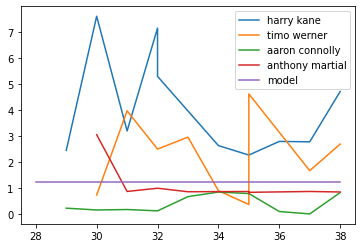

In [58]:
hold_df=hold_test.copy()
plt.plot(hold_df[hold_df['name']=='harry kane']['GW'],np.abs(hold_df[hold_df['name']=='harry kane']['y_pred']-hold_df[hold_df['name']=='harry kane']['y_test']),label='harry kane')
plt.plot(hold_df[hold_df['name']=='timo werner']['GW'],np.abs(hold_df[hold_df['name']=='timo werner']['y_pred']-hold_df[hold_df['name']=='timo werner']['y_test']),label='timo werner')
plt.plot(hold_df[hold_df['name']=='aaron connolly']['GW'],np.abs(hold_df[hold_df['name']=='aaron connolly']['y_pred']-hold_df[hold_df['name']=='aaron connolly']['y_test']),label='aaron connolly')
plt.plot(hold_df[hold_df['name']=='anthony martial']['GW'],np.abs(hold_df[hold_df['name']=='anthony martial']['y_pred']-hold_df[hold_df['name']=='anthony martial']['y_test']),label='anthony martial')
plt.plot([28,30,32,34,36,38],[1.2592478095185238,1.2592478095185238,1.2592478095185238,1.2592478095185238,1.2592478095185238,1.2592478095185238],label='model')
plt.legend()

In [59]:
hold_df[hold_df['GW']==28].sort_values(by='y_pred',ascending=False).head(5)

,name,GW,season,y_pred,y_test
162,che adams,28,21,3.129098,8
336,gabriel fernando de jesus,28,21,2.420553,7
230,danny ings,28,21,2.215942,0
776,sergio agüero,28,21,1.573876,6
785,shane long,28,21,0.200512,0


In [60]:
hold_df[hold_df['GW']==28].sort_values(by='y_test',ascending=False).head(5)

,name,GW,season,y_pred,y_test
162,che adams,28,21,3.129098,8
336,gabriel fernando de jesus,28,21,2.420553,7
776,sergio agüero,28,21,1.573876,6
220,daniel n'lundulu,28,21,0.105307,1
230,danny ings,28,21,2.215942,0


### KNN

In [ ]:
X_train=rolling_df_train.drop(columns='total_points')
X_test=rolling_df_test.drop(columns='total_points')

y_train=rolling_df_train['total_points']
y_test=rolling_df_test['total_points']

In [ ]:
X_train

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

reg = KNeighborsRegressor()
reg.fit(X_train, y_train)

result=cross_val_score(reg, X_train, y_train).mean()

result


In [ ]:
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)

# Midfielders

In [ ]:
mid_features=['name','assists','bps','clean_sheets','creativity','goals_conceded','goals_scored','ict_index',
              'influence','kickoff_time','minutes','penalties_missed','red_cards','selected',
              'threat','total_points','transfers_balance','value','was_home','yellow_cards','GW',
              'season','opponent_level','team_level']

In [ ]:
mid_train=mid_df_train[mid_features]
mid_test=mid_df_test[mid_features]

In [ ]:
mid_train['cards']=mid_train['yellow_cards']+mid_train['red_cards']
mid_test['cards']=mid_test['yellow_cards']+mid_test['red_cards']



In [ ]:
mid_train.columns

In [ ]:
rolling_features=['name','assists','bps','clean_sheets','creativity','goals_conceded','goals_scored','ict_index','influence',
                  'minutes','selected','threat','total_points','transfers_balance','value','penalties_missed','cards']

static_features=['kickoff_time','was_home','GW','season','opponent_level','team_level']



total_points_train=mid_train['total_points']
total_points_test=mid_test['total_points']




## Rolling Features

In [ ]:
rolling_df_train=mid_train[rolling_features].groupby('name').rolling(ra,closed = 'left').mean()
rolling_df_test=mid_test[rolling_features].groupby('name').rolling(ra,closed = 'left').mean()


In [ ]:
rolling_df_train.rename(columns={'total_points':'rolling_points'},inplace=True)
rolling_df_test.rename(columns={'total_points':'rolling_points'},inplace=True)

In [ ]:

result = map(lambda position:position, total_points_train)
rolling_df_train['total_points']=list(result)

result = map(lambda position:position, total_points_test)
rolling_df_test['total_points']=list(result)

In [ ]:
rolling_df_train.head()

In [ ]:
for i in static_features:
    result = map(lambda position:position, mid_train[i])
    rolling_df_train[i]=list(result)
for i in static_features:
    result = map(lambda position:position, mid_test[i])
    rolling_df_test[i]=list(result)



In [ ]:
rolling_df_train.head()

In [ ]:
rolling_df_train.dropna(inplace=True)
rolling_df_test.dropna(inplace=True)

In [ ]:
rolling_df_train.isnull().sum().sort_values(ascending=False)

In [ ]:
rolling_df_train.drop(columns=['creativity','influence','threat'],inplace=True)
rolling_df_test.drop(columns=['creativity','influence','threat'],inplace=True)

In [ ]:
time=[]
for row in rolling_df_train['kickoff_time']:
    time.append(row.hour)
rolling_df_train['time']=time

time=[]
for row in rolling_df_test['kickoff_time']:
    time.append(row.hour)
rolling_df_test['time']=time

In [ ]:
rolling_df_train.drop(columns='kickoff_time',inplace=True)
rolling_df_test.drop(columns='kickoff_time',inplace=True)

In [ ]:
rolling_df_train.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(rolling_df_train[['was_home']])
rolling_df_train['was_home'] = encoder.transform(rolling_df_train[['was_home']])

encoder = LabelEncoder()
encoder.fit(rolling_df_test[['was_home']])
rolling_df_test['was_home'] = encoder.transform(rolling_df_test[['was_home']])

In [ ]:
rolling_df_train=rolling_df_train.reset_index()
rolling_df_test=rolling_df_test.reset_index()


In [ ]:
rolling_df_train.head()

In [ ]:
hold_train=rolling_df_train[['name','GW','season']]
hold_test=rolling_df_test[['name','GW','season']]

rolling_df_train.drop(columns=['name','GW','season','level_1'],inplace=True)
rolling_df_test.drop(columns=['name','GW','season','level_1'],inplace=True)

In [ ]:
rolling_df_train.head()

In [ ]:
rolling_df_train.columns

In [ ]:
rolling_df_train.shape

## Models for the midfielders

### Gradient Boosting

In [ ]:
X_train=rolling_df_train.drop(columns='total_points')
X_test=rolling_df_test.drop(columns='total_points')

In [ ]:
y_train=rolling_df_train['total_points']
y_test=rolling_df_test['total_points']


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

reg = GradientBoostingRegressor(random_state=0,loss='ls')
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)

In [ ]:
result=cross_val_score(reg, X_train, y_train).mean()

result

In [ ]:
hold_test['y_pred']=y_pred

In [ ]:
hold_test['y_test']=y_test

In [ ]:
hold_test[hold_test['name']=='paul pogba']

In [ ]:
hold_test[hold_test['name']=='harry winks']

In [ ]:
hold_df=hold_test.copy()
plt.plot(hold_df[hold_df['name']=='harry winks']['GW'],np.abs(hold_df[hold_df['name']=='harry winks']['y_pred']-hold_df[hold_df['name']=='harry winks']['y_test']),label='harry winks')
plt.plot(hold_df[hold_df['name']=='paul pogba']['GW'],np.abs(hold_df[hold_df['name']=='paul pogba']['y_pred']-hold_df[hold_df['name']=='paul pogba']['y_test']),label='paul pogba')
plt.plot(hold_df[hold_df['name']=='declan rice']['GW'],np.abs(hold_df[hold_df['name']=='declan rice']['y_pred']-hold_df[hold_df['name']=='declan rice']['y_test']),label='declan rice')
plt.plot(hold_df[hold_df['name']=='mason mount']['GW'],np.abs(hold_df[hold_df['name']=='mason mount']['y_pred']-hold_df[hold_df['name']=='mason mount']['y_test']),label='mason mount')
plt.plot([28,30,32,34,36,38],[1.046823268074249,1.046823268074249,1.046823268074249,1.046823268074249,1.046823268074249,1.046823268074249],label='model')
plt.legend()

In [ ]:
hold_df[hold_df['GW']==38].sort_values(by='y_pred',ascending=False).head(5)

In [ ]:
hold_df[hold_df['GW']==38].sort_values(by='y_test',ascending=False).head(5)

### KNN

In [ ]:
X_train=rolling_df_train.drop(columns='total_points')
X_test=rolling_df_test.drop(columns='total_points')

y_train=rolling_df_train['total_points']
y_test=rolling_df_test['total_points']

In [ ]:
X_train

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

reg = KNeighborsRegressor()
reg.fit(X_train, y_train)

result=cross_val_score(reg, X_train, y_train).mean()

result


In [ ]:
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)

# Defenders

In [ ]:
def_features=['name','assists','bps','clean_sheets','creativity','goals_conceded','goals_scored',
              'ict_index','influence','kickoff_time','minutes','penalties_missed','red_cards',
              'selected','threat','total_points','transfers_balance','value','was_home',
              'yellow_cards','GW','season','opponent_level','team_level']

# Goalkeepers

In [ ]:
gk_features=['name','assists','bps','clean_sheets','creativity','goals_conceded','ict_index','influence',
             'kickoff_time','minutes','penalties_saved','red_cards','saves','selected','threat','total_points',
            'transfers_balance','value','was_home','yellow_cards','GW','season','opponent_level','team_level']

In [ ]:
def roll_match_features(df, roll=3, method='mean'):
    '''
    Returns the lagged dataframe with a chosen method and lagging window
    Adds a 'real_total_points' column
    '''
    # splitting into game features and known features
    known_features = ['name', 'opponent_team','kickoff_time','was_home',
                      'opponent_level','team_level','dreamteam_yearly_average','GW',
                      'team_id','season','kickoff_date','position']
    game_features = ['name','assists', 'bonus', 'bps', 'clean_sheets','creativity','goals_conceded',
                     'threat','goals_scored', 'ict_index','influence','kickoff_time', 'minutes',
                     'own_goals','penalties_missed', 'penalties_saved','red_cards', 'saves',
                     'transfers_balance','value','yellow_cards','team_a_score','team_h_score',
                     'total_points']
    
    df_pre_match = df[known_features]
    df_match = df[game_features]
    
    # roll with a given method
    rolled_df = df_match.groupby('name')
    if method == 'mean':
        rolled_df = rolled_df.rolling(roll,closed='left').mean()
    elif method == 'max':
        rolled_df = rolled_df.rolling(roll,closed='left').max()
    elif method == 'min':
        rolled_df = rolled_df.rolling(roll,closed='left').min()
    else: #do a mean() meathod
        rolled_df = rolled_df.rolling(roll,closed='left').mean()
    rolled_df.reset_index(inplace=True)
    
    # Add back the un-lagged, real total_points
    rolled_df['real_total_points'] = df_match['total_points']
    
    # Rename the rolled columns to how they were rolled
    game_features.remove('name')
    game_features_rolled=[]
    for feat in game_features:
        game_features_rolled.append('r_' + feat)
    feat_new_names_dict = dict(zip(game_features, game_features_rolled))
    rolled_df.rename(feat_new_names_dict,axis=1, inplace=True)
    
    # Join the features available pre-match
    data = rolled_df.join(df_pre_match[['opponent_team','kickoff_time','was_home',
                 'opponent_level','team_level','dreamteam_yearly_average','GW',
                  'team_id','season','kickoff_date','position']])
    
    # Delete the NaN values fromn the rolled 'points_pred' columns
    data = data[~data.r_total_points.isnull()]
    
    return data